Imports necessários apra a execução do programa

In [5]:
from collections import Counter
import numpy as np
import pandas as pd
from requests import head
import seaborn as sns
import matplotlib.pyplot as plt 
import time
import utilities.utilities as u
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from matplotlib import colormaps
import matplotlib.animation as animation

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package shakespeare to nltk_data...
[nltk_data]    | 

Limpeza do texto utilizando a função process_text

In [2]:
df_original=pd.read_csv('data/fake_and_real_news.csv')

# # inicio = time.time()
# # print("Tempo de início:", inicio)

# # cria um dataframe vazio apenas com as colunas 'Text' e 'label'
#    # este dataframe receberá a coluna 'text' do dataframe original após a limpeza dos dados 
# df_clean = pd.DataFrame({'Text': [], 'label': []})

#    # função que realiza a limpeza dos dados da coluna 'text'
# df_clean['Text'] = df_original['Text'].apply(u.preprocess_text)
   
   # salva o novo dataframe contendo o texto limpo no disco 
# df_clean.to_csv('dados_limpos.csv', index=False)  # index=False para não salvar o índice

# fim = time.time()
# tempo_total = fim - inicio
# print("Tempo de término:", fim)
# print("Tempo total de execução:", tempo_total)


Normalização da coluna 'label'

In [5]:
df_clean=pd.read_csv('cleaned_data/dados_limpos.csv')
mapeamento = {'Real': 1, 'Fake': 0}
   
# cópia e escita em disco da coluna 'label' normalizada para o dataframe que contém os dados limpos 
df_clean['label'] = df_original['label'].map(mapeamento)
# df_clean.to_csv('cleaned_data/dados_limpos.csv', index=False)

Ordenação das palavras das noticias por frequencia 

In [6]:

df_clean=pd.read_csv('cleaned_data/dados_limpos.csv')

fake_news = df_clean[df_clean['label'] == 0]['Text']
real_news = ' '.join(df_clean[df_clean['label'] == 1]['Text'])

resultado_fake = u.ordenar_palavras_frequencia(df_clean, 'label', 'Text', 0)
# Converter o dicionário de palavras frequentes ordenadas em um DataFrame
df_palavras_frequentes = pd.DataFrame(resultado_fake, columns=['Word', 'Frequency'])
# Salvar o DataFrame em um arquivo CSV
# df_palavras_frequentes.to_csv('cleaned_data/fake_palavras_frequentes.csv', index=False)

   
resultado_real = u.ordenar_palavras_frequencia(df_clean, 'label', 'Text', 1)
# Converter o dicionário de palavras frequentes ordenadas em um DataFrame
df_palavras_frequentes = pd.DataFrame(resultado_real, columns=['Word', 'Frequency'])
# Salvar o DataFrame em um arquivo CSV
# df_palavras_frequentes.to_csv('cleaned_data/real_palavras_frequentes.csv', index=False)


Contagem de palavras por cada categoria (fake, real)

In [6]:
df_clean = pd.read_csv('cleaned_data/dados_limpos.csv')

fake_news = df_clean[df_clean['label'] == 0]['Text']
real_news = df_clean[df_clean['label'] == 1]['Text']

count_fake = u.contagem_palavras(fake_news)
count_real = u.contagem_palavras(real_news)

print("qtde palavras noticias fake: ", count_fake, "\nqtde palavras noticias reais: ", count_real)


qtde palavras noticias fake:  1207771 
qtde palavras noticias reais:  1162724


Gráficos

Histograma - Contagem de noticias por rlabel - real/fake

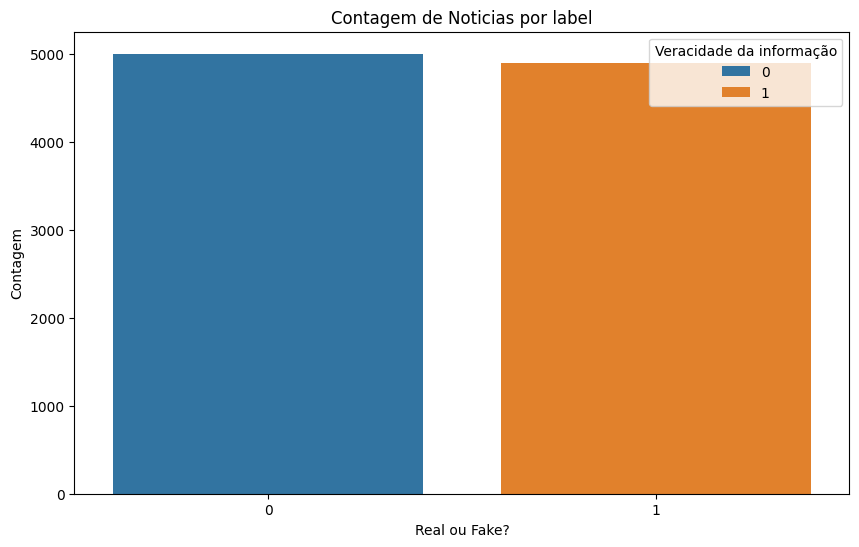

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x="label", hue="label")
plt.title("Contagem de Noticias por label")
plt.xlabel("Real ou Fake?")
plt.ylabel("Contagem")
plt.legend(title="Veracidade da informação")
# plt.savefig('images/cont_noticias_label.png', dpi=300)
plt.show()

Gráfico de Barras - contagens da quantidade de palavras por cada categoria de noticia

In [ ]:
contagens = [count_real, count_fake]
plt.bar(['Noticias Reais', 'Noticias fake'], contagens, color=['green', 'purple'], align='edge', width=1.2)
plt.title('Contagem de Palavras em Notícias Reais e Fakes')
plt.xlabel('Tipo de Notícia')
plt.ylabel('Contagem de Palavras')
# plt.savefig('images/cont_palavras_label.png', dpi=300)
plt.show()

Wordcloud - Nuvem de palavras para noticias 

Wordcloud para noticias marcadas como 'real' ou '1'

In [ ]:
real_news_copy = ' '.join(real_news)
wordcloud_real = WordCloud(width=800, height=400, background_color ='white', max_words=2000).generate(real_news_copy)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title("Nuvem de palavras das noticias marcadas como 'Real'/'1'")
# plt.savefig('images/wordcloud_real.png', dpi=300)
plt.show()

Wordcloud para noticias marcadas como 'fake' ou '0'

In [ ]:
fake_news_copy = ' '.join(fake_news)
wordcloud_fake = WordCloud(width=800, height=400, background_color ='white', max_words=2000).generate(fake_news_copy)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Nuvem de palavras das noticias marcadas como 'Fake'/'0'")
# plt.savefig('images/wordcloud_fake.png', dpi=300)
plt.show()

Histograma de comprimento de texto

In [ ]:
df_clean.to_csv('cleaned_data/dados_limpos.csv', index=False)
df_clean['Text_length'] = df_clean['Text'].apply(len)

# Filtrando dados para notícias reais e falsas
real_len = df_clean[df_clean['label'] == 1]['Text_length']
fake_len = df_clean[df_clean['label'] == 0]['Text_length']

# ignora valores maiores que 8000 
real_len_limpo = real_len[real_len <= 8000]
fake_len_limpo = fake_len[fake_len <= 8000]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subplot para notícias reais
plt.hist(real_len_limpo, bins=25, color='green', alpha=0.7, ec='black', density=True)
plt.title('Distribuição do Comprimento das Notícias Reais')
plt.xlabel('Comprimento do Texto')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)  # Subplot para notícias falsas
plt.hist(fake_len_limpo, bins=25, color='purple', alpha=0.7, ec='black', density=True)
plt.title('Distribuição do Comprimento das Notícias Falsas')
plt.xlabel('Comprimento do Texto')
plt.ylabel('Frequência')

plt.tight_layout()  # Ajusta automaticamente os subplots para evitar sobreposição
# plt.savefig('images/dist_comp_news.png', dpi=300)
plt.show()

Boxplot da distribuição do comprimento das noticias

C:\Users\lhsan\AppData\Local\Temp\ipykernel_2884\1386986542.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='Text_length', data=df_clean, palette={'1': 'green', '0': 'orange'}, showfliers=False) # comando para não exibir os outliers no bloxplot


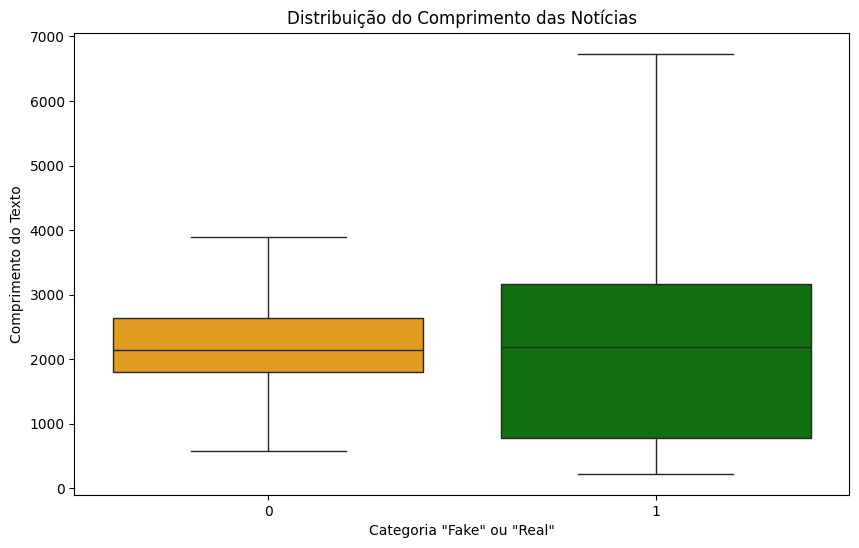

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='Text_length', data=df_clean, palette={'1': 'green', '0': 'orange'}, showfliers=False) # comando para não exibir os outliers no bloxplot
plt.title('Distribuição do Comprimento das Notícias')
plt.xlabel('Categoria "Fake" ou "Real"')
plt.ylabel('Comprimento do Texto')
# plt.savefig('images/boxplot_comp.png', dpi=300)
plt.show()

Contagem de palavras por cada categoria

In [ ]:
df_clean = pd.read_csv('cleaned_data/dados_limpos.csv')

fake_news = df_clean[df_clean['label'] == 0]['Text']
real_news = df_clean[df_clean['label'] == 1]['Text']

count_fake = u.contagem_palavras(fake_news)
count_real = u.contagem_palavras(real_news)

print("qtde palavras noticias fake: ", count_fake, "\nqtde palavras noticias reais: ", count_real)

Cálculo de métricas básicas como média, desvio padrão, etc. 

In [ ]:

df_freq = pd.read_csv('cleaned_data/merged_freq.csv')

real_len = df_clean[df_clean['label'] == 1]['Text_length']
fake_len = df_clean[df_clean['label'] == 0]['Text_length']

desc_stats_real = df_freq['Frequency_real'].describe()
desc_stats_fake = df_freq['Frequency_fake'].describe()   

total_size_real = df_freq['Frequency_real'].sum()
total_size_fake = df_freq['Frequency_fake'].sum()

desc_df = pd.DataFrame({
    'Statistic': ['Size', 'Mean', 'Median', 'Std', 'Min', 'Max'],
    'Real': [total_size_real, desc_stats_real['mean'], desc_stats_real['50%'], desc_stats_real['std'], desc_stats_real['min'], desc_stats_real['max']],
    'Fake': [total_size_fake, desc_stats_fake['mean'], desc_stats_fake['50%'], desc_stats_fake['std'], desc_stats_fake['min'], desc_stats_fake['max']]
})


Análise de Sentimento

In [8]:
df_original = pd.read_csv('data/fake_and_real_news.csv')

sid = SentimentIntensityAnalyzer()
message_text = df_original['Text'][0]
scores = sid.polarity_scores(message_text)

for key in sorted(scores):
    print('{0}: {1}, '.format(key, scores[key]), end='')


compound: -0.9315, neg: 0.119, neu: 0.817, pos: 0.064, 